# Without Tensorflow

In [1]:
import csv
from PIL import Image # pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd # pip install pandas

In [2]:
NUM_PEOPLE_TO_READ_IN = 10000
TEST_RATIO = 0.20;

In [3]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data", str(mask_type), filename))) / 255.0
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"]
    data["X"] = data["X"]
    data["Y"] = data["Y"].astype("int")

In [4]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(40000, 50, 50, 3)
(40000, 7500)
(40000,)


In [5]:
pd.DataFrame(data["X"])

,0,1,2,3,4,5,6,7,8,9,...,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.600000,0.478431,0.458824,0.623529,0.501961,0.482353,0.639216,0.521569,0.490196,0.658824,...,0.031373,0.439216,0.207843,0.231373,0.403922,0.160784,0.180392,0.376471,0.133333,0.152941
1,0.647059,0.529412,0.529412,0.658824,0.541176,0.541176,0.670588,0.560784,0.556863,0.686275,...,0.094118,0.505882,0.231373,0.270588,0.533333,0.243137,0.294118,0.478431,0.188235,0.239216
2,0.698039,0.627451,0.611765,0.709804,0.639216,0.623529,0.729412,0.650980,0.647059,0.741176,...,0.156863,0.400000,0.227451,0.278431,0.529412,0.309804,0.360784,0.447059,0.211765,0.258824
3,0.756863,0.717647,0.721569,0.772549,0.733333,0.737255,0.788235,0.729412,0.749020,0.800000,...,0.321569,0.372549,0.172549,0.231373,0.239216,0.078431,0.141176,0.305882,0.164706,0.219608
4,0.800000,0.749020,0.686275,0.788235,0.737255,0.674510,0.827451,0.764706,0.713725,0.831373,...,0.137255,0.211765,0.176471,0.117647,0.207843,0.180392,0.117647,0.211765,0.184314,0.121569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.658824,0.698039,0.662745,0.670588,0.709804,0.674510,0.682353,0.721569,0.686275,0.690196,...,0.156863,0.164706,0.125490,0.117647,0.145098,0.101961,0.094118,0.145098,0.101961,0.094118
39996,0.152941,0.039216,0.023529,0.145098,0.031373,0.015686,0.141176,0.027451,0.011765,0.141176,...,0.360784,0.501961,0.364706,0.290196,0.466667,0.337255,0.262745,0.435294,0.305882,0.231373
39997,0.078431,0.015686,0.015686,0.094118,0.031373,0.031373,0.090196,0.035294,0.031373,0.082353,...,0.168627,0.560784,0.490196,0.482353,0.729412,0.615686,0.560784,0.705882,0.564706,0.478431
39998,0.113725,0.035294,0.031373,0.113725,0.035294,0.031373,0.113725,0.043137,0.035294,0.113725,...,0.439216,0.552941,0.482353,0.443137,0.556863,0.482353,0.454902,0.549020,0.474510,0.447059


In [6]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

,Y
0,1
1,2
2,3
3,4
4,1
...,...
39995,4
39996,1
39997,2
39998,3


In [7]:
# Maximum of 10000 people (~240MB for .ipynb file) for full dataset
# Maximum of about 1045 people (25MB for .ipynb file) for Jupyter Notebook
# Maximum of about 4180 people (100MB for .ipynb file) for github upload
NUM_PEOPLE_TO_PLOT=100

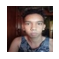

In [11]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_PLOT))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_PLOT, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    if(counter >= NUM_PEOPLE_TO_PLOT):
        break;

In [9]:
#shuffler = np.random.permutation(NUM_PEOPLE_TO_READ_IN*4)

#cut_index = int(NUM_PEOPLE_TO_READ_IN*4*TEST_RATIO)

#x_scaled = data["X"]*2-1

#x_shuffled = x_scaled[shuffler]
#y_shuffled = data["Y"][shuffler]

#x_train = x_shuffled[cut_index:]
#x_test = x_shuffled[0:cut_index]

#y_train = y_shuffled[cut_index:]
#y_test = y_shuffled[0:cut_index]


In [10]:
#print(data["images"].shape)

#print(x_train.shape)
#print(x_test.shape)

#print(y_train.shape)
#print(y_test.shape)